In [29]:
import pandas as pd
accept = pd.read_csv('../rawData/accepted_2007_to_2018Q4.csv')

# Remove subtotal rows
def find_weird(x):
    try:
        _ = int(x)
        return(True)
    except:
        return(False)

accept = accept[accept['id'].apply(find_weird)]
accept['id'] = accept['id'].apply(int)
accept['id'].dtype

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


dtype('int64')

In [32]:
# Look at rates as a function of month
import datetime as dt
def to_dt(s):
    s = s.split('-')
    return(dt.datetime.strptime(s[1] + s[0] + '01', '%Y%b%d'))
accept['issue_d'] = accept['issue_d'].apply(to_dt)

In [33]:
accept['year'] = accept['issue_d'].map(lambda x: x.year)

In [34]:
grades = accept.groupby(['year', 'grade'])['int_rate'].mean().unstack()

Text(30.25, 0.5, '%')

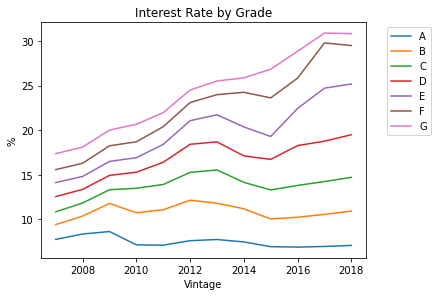

In [58]:
import matplotlib.pyplot as plt
grades.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grades.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Interest Rate by Grade')
plt.xlabel('Vintage')
plt.ylabel('%')

In [42]:
recent = pd.read_pickle('../derivedData/train.pkl')

In [43]:
def to_dt_pickle(i):
    return(dt.datetime.strptime(str(i), '%Y%m%d'))

recent['issue_d'] = recent['issue_d'].apply(to_dt_pickle)

In [54]:
recent['year'] = recent['issue_d'].map(lambda x: x.year)
recent['return'] = recent['PV'] / recent['funded_amnt']

In [89]:
values = recent.groupby(['year', 'grade'])['return'].median().unstack()
issuance = recent.groupby(['year'])['funded_amnt'].sum()/1e9

In [80]:
issuance

year
2009    0.051596
2010    0.126210
2011    0.257045
2012    0.717300
2013    1.981658
2014    3.251544
2015    5.494345
2016    3.619044
Name: funded_amnt, dtype: float64

Text(0, 0.5, 'Issuance ($bn)')

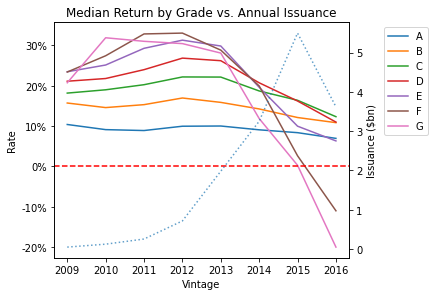

In [90]:
import matplotlib as mpl
values.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
ax1 = values.plot()
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0%}'))
ax1.axhline(linestyle="--", c='red')
plt.legend(bbox_to_anchor=(1.1, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Median Return by Grade vs. Annual Issuance')
plt.xlabel('Vintage')
plt.ylabel('Rate')
ax2=ax1.twinx()
ax2.plot(issuance, alpha=0.7, label='Issuance', linestyle='dotted')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_ylabel('Issuance ($bn)')